In [ ]:
!pip install deap
!pip install sklearn
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=ea3e04b8157a12c2a50097234aaef661c9fa342a49ee49f11f9a597629d0c5d4
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from tqdm.notebook import tqdm

In [ ]:

# Specify the file path and name
filename = 'test.csv'
rate = 0.7

# Read the .data file into a DataFrame
data = pd.read_csv(filename, header=None, skiprows=[0])

train, test = train_test_split(data, test_size=0.3, random_state=25)


# Display the data
print(test[0])

942     36
415     34
1259    30
466     41
424     57
        ..
547     42
1292    39
1186    35
37      35
387     40
Name: 0, Length: 441, dtype: int64


In [ ]:


# Load the dataset
#data = pd.read_csv("sonar.data", header=None)
'''
def evaluate(individual):
  # Separate the features (X) and the labels (y)
  # Select partial features based on the binary array
  individual = np.array(individual)
  individual[-1] = 0
  X = data.iloc[:, individual == 1]
  y = data.iloc[:, -1]

  # Split the dataset into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  # Create a KNN classifier with k=5
  knn = KNeighborsClassifier(n_neighbors=5)

  # Train the classifier using the training data
  knn.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = knn.predict(X_test)

  # Calculate the accuracy of the classifier
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy, sum(individual)
'''

def evaluate(individual):
    # Separate the features (X) and the labels (y)
    # Select partial features based on the binary array
    individual = np.array(individual)
    individual[-1] = 0


    # Check if any features are selected
    if sum(individual) == 0:
        # Handle the case when no features are selected
        print("No features selected!")
        return (float(1), float("inf"))

    X = train.iloc[:, individual == 1]
    y = train.iloc[:, -1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    try:
        # Create a KNN classifier with k=5
        knn = KNeighborsClassifier(n_neighbors=5)

        # Train the classifier using the training data
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate the classification error
        err = 1 - accuracy_score(y_test, y_pred)

        # Calculate the number of selected features
        num_features = sum(individual)

        return (err, num_features)

    except ValueError as e:
        print("ValueError:", e)
        print("X_train shape:", X_train.shape)
        print("y_train shape:", y_train.shape)

        return (float("inf"), float("inf"))

def evaluate_test(individual):
    # Separate the features (X) and the labels (y)
    # Select partial features based on the binary array
    individual = np.array(individual)
    individual[-1] = 0


    # Check if any features are selected
    if sum(individual) == 0:
        # Handle the case when no features are selected
        print("No features selected!")
        return (float(1), float("inf"))

    X = test.iloc[:, individual == 1]
    y = test.iloc[:, -1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    try:
        # Create a KNN classifier with k=5
        knn = KNeighborsClassifier(n_neighbors=5)

        # Train the classifier using the training data
        knn.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn.predict(X_test)

        # Calculate the classification error
        err = 1 - accuracy_score(y_test, y_pred)

        # Calculate the number of selected features
        num_features = sum(individual)

        return (err, num_features)

    except ValueError as e:
        print("ValueError:", e)
        print("X_train shape:", X_train.shape)
        print("y_train shape:", y_train.shape)

        return (float("inf"), float("inf"))


individual = np.random.randint(0,2, size=32)
individual = np.ones(32)
print("Classification Error using all features: " + str(evaluate(individual)[0]) + "\nNumber of features: " + str(evaluate(individual)[1]))

ValueError: could not convert string to float: 'Travel_Rarely'
X_train shape: (720, 31)
y_train shape: (720,)
ValueError: could not convert string to float: 'Travel_Rarely'
X_train shape: (720, 31)
y_train shape: (720,)
Classification Error using all features: inf
Number of features: inf


/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Progress:   0%|          | 0/50 [00:00<?, ?iteration/s]

ValueError: could not convert string to float: 'Travel_Rarely'
X_train shape: (720, 21)
y_train shape: (720,)
ValueError: could not convert string to float: 'Non-Travel'
X_train shape: (720, 17)
y_train shape: (720,)
ValueError: could not convert string to float: 'Research & Development'
X_train shape: (720, 17)
y_train shape: (720,)
ValueError: could not convert string to float: 'Travel_Rarely'
X_train shape: (720, 14)
y_train shape: (720,)
ValueError: could not convert string to float: 'Travel_Rarely'
X_train shape: (720, 15)
y_train shape: (720,)
ValueError: could not convert string to float: 'Female'
X_train shape: (720, 17)
y_train shape: (720,)
ValueError: could not convert string to float: 'Marketing'
X_train shape: (720, 15)
y_train shape: (720,)
ValueError: could not convert string to float: 'Travel_Rarely'
X_train shape: (720, 19)
y_train shape: (720,)
ValueError: could not convert string to float: 'Travel_Rarely'
X_train shape: (720, 16)
y_train shape: (720,)
ValueError: cou

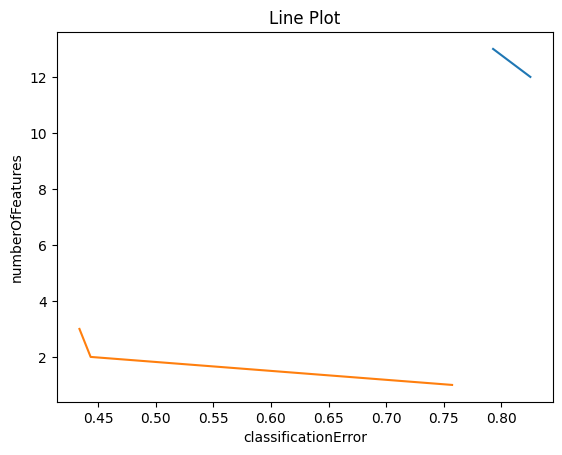

In [ ]:


'''
# Define the evaluation function for your problem
def evaluate(individual):
    # Replace this with your own evaluation function
    # Calculate the fitness values based on your objectives
    fitness1 = sum(individual)  # Example objective 1: minimize the sum of features
    fitness2 = random.random()  # Example objective 2: minimize a random value
    return fitness1, fitness2
'''

# Create the fitness and individual classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Create a toolbox with the necessary components
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=32)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxUniformPartialyMatched,indpb =0.9)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)
toolbox.register("select", tools.selNSGA2)
plt.ion()
def main():
    population_size = 100
    num_generations = 50
    # Create an initial population
    population = toolbox.population(n=population_size)
    '''
    # Print the initial Pareto front solutions
    pareto_front = tools.sortNondominated(population, k=population_size, first_front_only=True)
    print(pareto_front)
    for solution in pareto_front:
        print("Fitness 1:", toolbox.evaluate(solution)[0])
        print("Fitness 2:", toolbox.evaluate(solution)[1])
        print("Features:", solution)
    '''

    classificationErrors = []
    numberOfFeatures = []

    # Run the NSGA-II algorithm
    for generation in tqdm(range(num_generations), desc="Progress", unit="iteration"):# Evaluate the fitness of individuals
        for individual in population:
            individual.fitness.values = toolbox.evaluate(individual)

        population = [ind for ind in population if any(ind)]

        # Select parents using NSGA-II selection
        offspring = toolbox.select(population, len(population))

        # Apply crossover and mutation on the offspring
        offspring = algorithms.varAnd(offspring, toolbox, cxpb=0.9, mutpb=0.01)

        offspring = [ind for ind in offspring if any(ind)]
        # Evaluate the fitness of the offspring
        for individual in offspring:
            individual.fitness.values = toolbox.evaluate(individual)

        # Combine the parent population and offspring
        population[:] = population + offspring

        # Select the next generation population
        population = toolbox.select(population, k=population_size)

        # Print the final Pareto front solutions
        pareto_front = tools.sortNondominated(population, k=population_size, first_front_only=True)

        classificationError = []
        numberOfFeature = []
        points = []

        #for solution in pareto_front:
        for element in pareto_front[0]:
            fitness1 = element.fitness.values[0]
            fitness2 = element.fitness.values[1]
            features = element
            #print(len(solution))
            #print("Fitness 1:", fitness1)
            #print("Fitness 2:", fitness2)
            #print("Features:", features)

            classificationError.append(fitness1)
            numberOfFeature.append(fitness2)
            points.append([fitness1, fitness2])

        sorted_points = sorted(points, key=lambda v: v[0])
        #plt.plot(np.array(np.asarray(sorted_points)[:,0]), np.array(np.asarray(sorted_points)[:,1]))

        sorted_points = np.array(np.asarray(sorted_points))

        if generation == 0:
            plt.plot(np.array(np.asarray(sorted_points)[:,0]), np.array(np.asarray(sorted_points)[:,1]), alpha = 1)
        elif generation == num_generations - 1:
            plt.plot(np.array(np.asarray(sorted_points)[:,0]), np.array(np.asarray(sorted_points)[:,1]), alpha = 1)
            min_point = [subarr for subarr in sorted_points if subarr[0] == np.min(sorted_points[0])][0]
            print(min_point)
            print("MCE on train: " + str(min_point[0]) + "\nNumber of features: " + str(min_point[1]))

            p_max = [1, len(data[0])]
            area = 0

            for p_index in range(len(sorted_points)):
                if p_index == 0:
                    area += abs(sorted_points[p_index][0] - p_max[0]) * abs(sorted_points[p_index][1] - p_max[1])
                else:
                    area += abs(sorted_points[p_index][0] - sorted_points[p_index-1][0]) * abs(sorted_points[p_index][1] - p_max[1])

            print("HV area: " + str(area))

            for element in pareto_front[0]:
                if element.fitness.values[1] == min_point[1]:
                    MCE_test = evaluate_test(element)
                    print("Solution: " + str(element))
                    print("MCE on test: " + str(MCE_test[0]))
                    break



        #else:
            #plt.plot(np.array(np.asarray(sorted_points)[:,0]), np.array(np.asarray(sorted_points)[:,1]), alpha = 0.3)

        #classificationErrors.append(classificationError)
        #numberOfFeatures.append(numberOfFeature)

    # Flatten the data into a single list
    #numberOfFeatures = [value for sublist in numberOfFeatures for value in sublist]
    #classificationErrors = [value for sublist in classificationErrors for value in sublist]

    # Create a line plot
    #plt.scatter(numberOfFeatures,classificationErrors, marker='o', s=100)

    # Set the title and labels for x and y axes
    plt.title("Line Plot")
    plt.xlabel("classificationError")
    plt.ylabel("numberOfFeatures")
    plt.ioff()
    # Display the plot
    plt.show()



if __name__ == "__main__":
    main()


In [ ]:
def select_subarray_by_first_value(arr, value):
    return [subarr for subarr in arr if subarr[0] == np.min(arr[0])]

# Example usage
my_array = [[1, 2, 3], [4, 5, 6], [5, 7, 8], [9, 10, 11]]
selected_subarray = select_subarray_by_first_value(my_array, 1)
print(selected_subarray)  # Output: [[1, 2, 3], [1, 7, 8]]

for i in range(3):
  print(i)

[[1, 2, 3]]
0
1
2


In [ ]:
for element in pareto_front[0]:
    if element.fitness.values[1] == min_point[1]:
        MCE_test = evaluate_test(element)
        print("Solution: " + str(element))
        print("MCE on test: " + str(MCE_test[0]))
        break

NameError: ignored